<a href="https://colab.research.google.com/github/utkarshshukla03/Insurance-Claims-Data-Reporting-Trend-Analysis/blob/main/Insurance%20Claims%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Please upload the 'insurance_claims.csv' file:


Saving insurance_claims.csv to insurance_claims.csv

✅ Data Loaded Successfully! Preview:


,claim_id,policy_type,customer_age,region,claim_amount,claim_date
0,1,Health Plus,45,Region A,5000,2023-01-15
1,2,Auto Secure,32,Region B,1200,2023-01-20
2,3,Health Plus,58,Region A,7000,2023-02-10
3,4,Home Guard,40,Region C,1500,2023-02-12
4,5,Auto Secure,29,Region B,1000,2023-03-05



✅ Data Cleaning Complete. Sample Data:


,claim_id,policy_type,customer_age,region,claim_amount,claim_date,claim_month
0,1,Health Plus,45,Region A,5000,2023-01-15,2023-01
1,2,Auto Secure,32,Region B,1200,2023-01-20,2023-01
2,3,Health Plus,58,Region A,7000,2023-02-10,2023-02
3,4,Home Guard,40,Region C,1500,2023-02-12,2023-02
4,5,Auto Secure,29,Region B,1000,2023-03-05,2023-03


/tmp/ipython-input-3276475185.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


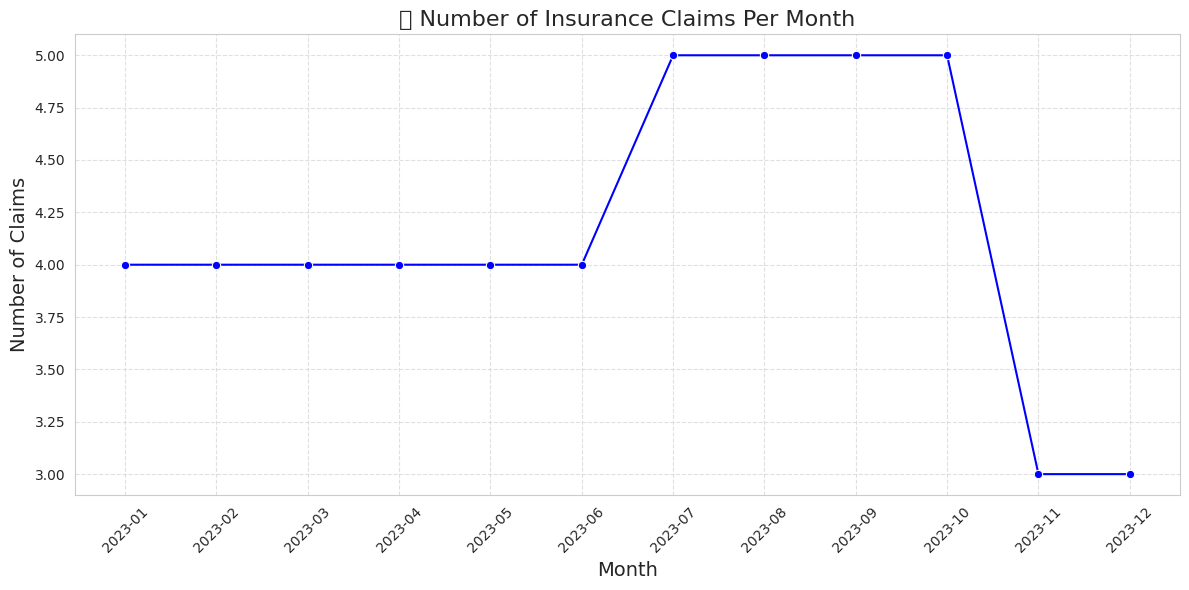

/tmp/ipython-input-3276475185.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_claims.index, y=region_claims.values, palette='viridis')
/tmp/ipython-input-3276475185.py:57: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


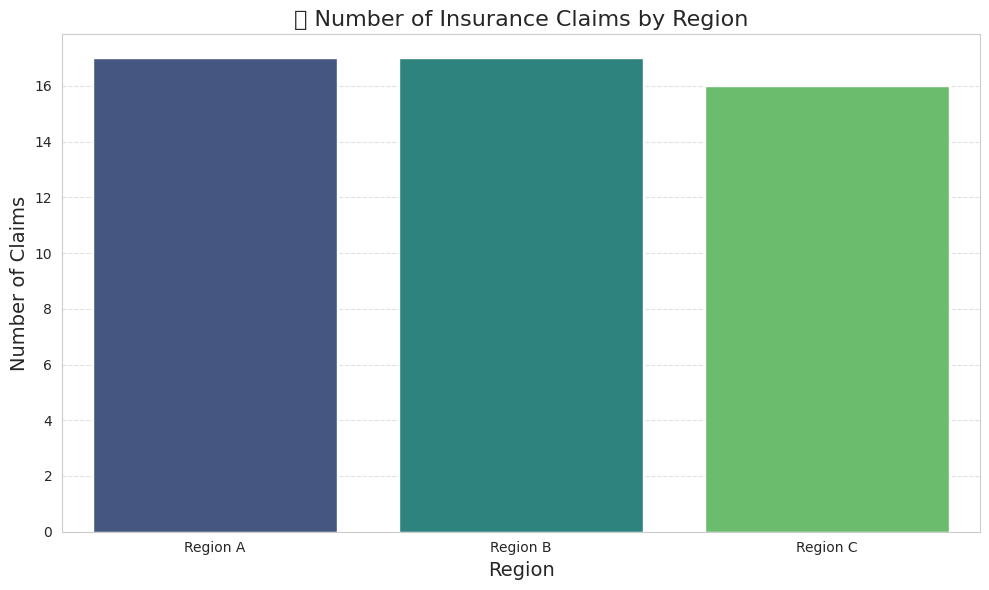

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


🎉 Analysis Complete! ✅ Download your beautifully formatted report.


In [2]:
# Step 1 – Install Required Package
!pip install openpyxl

# Step 2 – Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook
from google.colab import files

# Set a better visual style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Step 3 – Upload Dataset
print("🚀 Please upload the 'insurance_claims.csv' file:")
uploaded = files.upload()

# Step 4 – Load Dataset
data = pd.read_csv('insurance_claims.csv', parse_dates=['claim_date'])
print("\n✅ Data Loaded Successfully! Preview:")
display(data.head())

# Step 5 – Data Cleaning
data.drop_duplicates(inplace=True)
data['claim_amount'] = pd.to_numeric(data['claim_amount'], errors='coerce')
data.dropna(inplace=True)
data['claim_month'] = data['claim_date'].dt.to_period('M')

print("\n✅ Data Cleaning Complete. Sample Data:")
display(data.head())

# Step 6 – Exploratory Data Analysis

# Plot 1: Number of Claims Over Time
monthly_claims = data.groupby('claim_month').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_claims.index.astype(str), y=monthly_claims.values, marker='o', color='blue')
plt.title('📊 Number of Insurance Claims Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot 2: Claims by Region
region_claims = data['region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_claims.index, y=region_claims.values, palette='viridis')
plt.title('🏢 Number of Insurance Claims by Region')
plt.xlabel('Region')
plt.ylabel('Number of Claims')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Step 7 – Generate Automated Excel Report

wb = Workbook()
ws = wb.active
ws.title = "Insurance Claims Report"

# Add headers
headers = ['Claim Month', 'Total Claims', 'Average Claim Amount']
ws.append(headers)

# Add monthly summary data
monthly_summary = data.groupby('claim_month').agg(
    total_claims=('claim_id', 'count'),
    avg_claim_amount=('claim_amount', 'mean')
).reset_index()

for row in monthly_summary.itertuples(index=False):
    ws.append([str(row.claim_month), row.total_claims, round(row.avg_claim_amount, 2)])

report_filename = 'insurance_claims_report.xlsx'
wb.save(report_filename)

# Step 8 – Download Report
files.download(report_filename)

print("\n🎉 Analysis Complete! ✅ Download your beautifully formatted report.")
